## Reading and understanding the data

Importing pandas and numpy libraries to read the data

In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install scikit-learn

In [3]:
!pip install catboost

In [4]:
!pip install xgboost

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


pd.set_option('display.max_columns', None)

In [6]:
#If running in VS Code
# df=pd.read_csv("./data/data.csv")

#If running in Jupyter Notebook
df=pd.read_csv(r"E:\Personal Projects\demandPrediction\notebook\data\data.csv")

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspecting the various aspects of the dataframe

In [8]:
df.shape

(730, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We can see that there are no missing values in the dataframe.

In [10]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Dropping "instant" variable as it is just index of the entries and doesn't add any value to our analysis

In [11]:
df=df.drop("instant",axis=1)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# Converting date to Pandas datetime format
df['dteday'] = pd.to_datetime(df['dteday'],format="%d-%m-%Y")
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,2018-01-06,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,2018-01-07,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,2018-01-08,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,2018-01-09,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,2018-01-10,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


## Visualising the business problem

As per the problem statement, the revenue drop is due to the corona virus pandemic. While the data we have is only from 2018-01-01 to 2019-12-31, still trying to visualise the business problem.<br>
Plotting a lineplot between target variable 'cnt' and 'mnth' for 2019 year's data, where we can see a significant drop in 'cnt' from around october 2019.

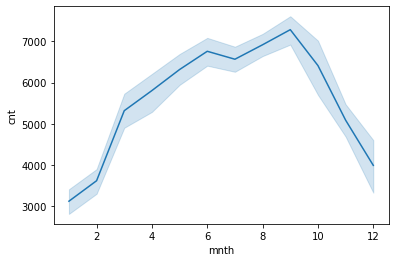

In [13]:
sns.lineplot(x='mnth',y='cnt',data=df[(df['yr']==1)])
plt.show()

Converting "season","yr","mnth","weekday" and "weathersit" to categorical variables, as the number assignment will not add value to the model. We can convert these categorical variables to dummy variables later to feed to the model.

In [14]:
def func1(x):
    if x==1:
        return "spring"
    elif x==2:
        return "summer"
    elif x==3:
        return "fall"
    else:
        return "winter"

df['season']=df['season'].apply(func1)
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
def year_assign(x):
    if x==1:
        return "2019"
    else:
        return "2018"

df['yr']=df['yr'].apply(year_assign)
df.yr.value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [16]:
def month_assign(x):
    return x.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",
                 7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

df[['mnth']]=df[['mnth']].apply(month_assign)

In [17]:
df.mnth.value_counts()

Mar    62
Jan    62
Aug    62
May    62
Oct    62
Jul    62
Dec    62
Apr    60
Sep    60
Nov    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [18]:
df.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [19]:
def weekday_assign(x):
    return x.map({1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat",0:"Sun"})

df[['weekday']]=df[['weekday']].apply(weekday_assign)

In [20]:
df.weekday.value_counts()

Tue    105
Mon    105
Thu    104
Fri    104
Sun    104
Wed    104
Sat    104
Name: weekday, dtype: int64

In [21]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [22]:
def weather_assign(x):
    return x.map({1:"Clear",2:"Mist + Clouds",3:"Light snow/rain/thu",4:"Heavy snow/rain/thu"})

df[['weathersit']]=df[['weathersit']].apply(weather_assign)

In [23]:
df.weathersit.value_counts()

Clear                  463
Mist + Clouds          246
Light snow/rain/thu     21
Name: weathersit, dtype: int64

In [24]:
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,2018,Jan,0,Mon,1,Mist + Clouds,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,spring,2018,Jan,0,Tue,1,Mist + Clouds,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,spring,2018,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,2018-01-06,spring,2018,Jan,0,Sat,0,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,2018-01-07,spring,2018,Jan,0,Sun,0,Mist + Clouds,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,2018-01-08,spring,2018,Jan,0,Mon,1,Mist + Clouds,6.765000,8.11270,53.5833,17.875868,68,891,959
8,2018-01-09,spring,2018,Jan,0,Tue,1,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,2018-01-10,spring,2018,Jan,0,Wed,1,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


## Visualising the data

#### Visualising numerical data

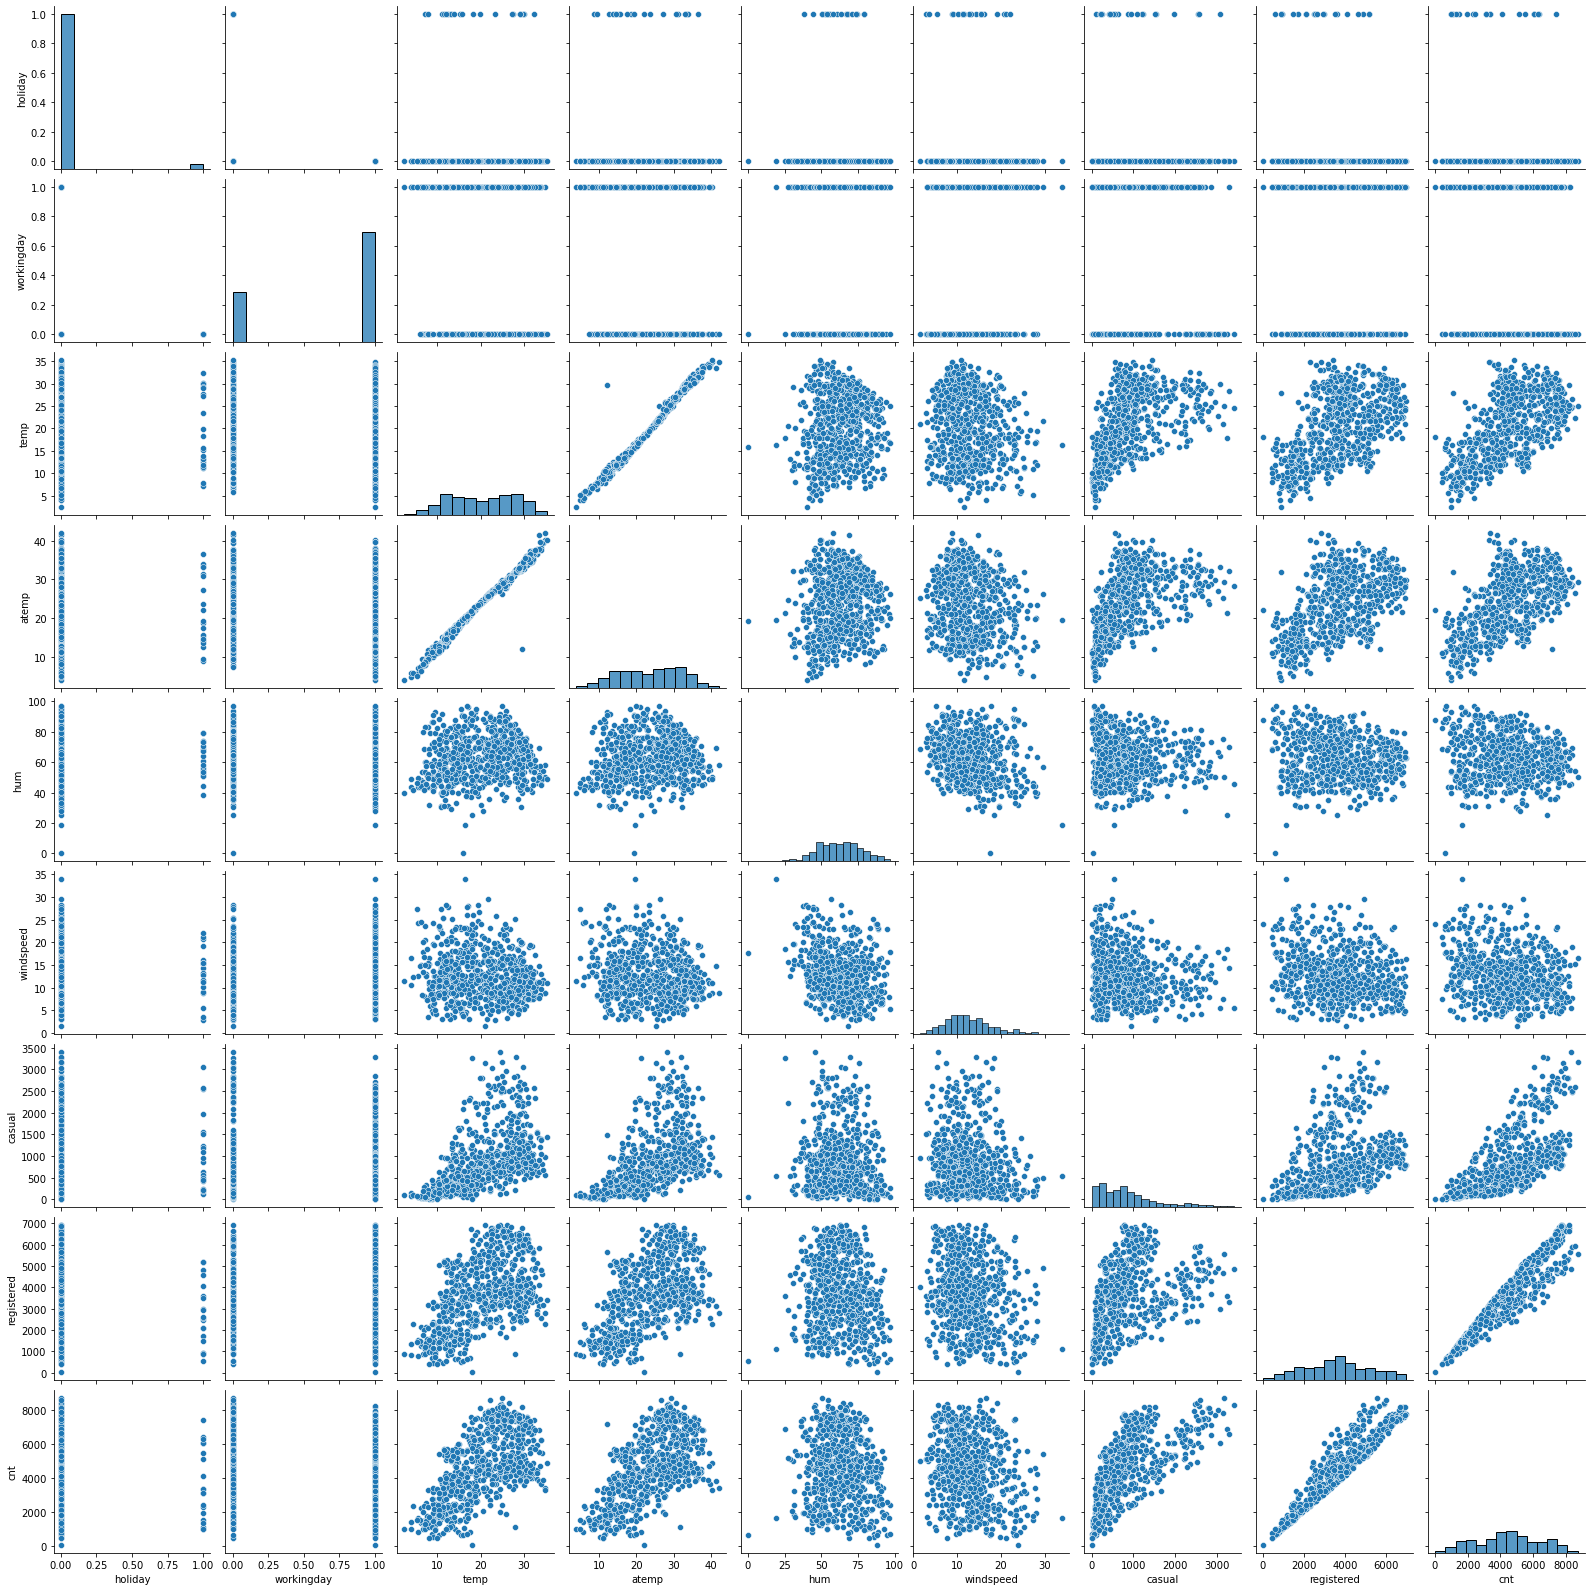

In [25]:
sns.pairplot(df)
plt.show()

From the above pairplot we can observe the below facts:
1. There is a liner relation between temp,atemp and the target variable 'cnt'. Since there are linear relationships in the data, we can go ahead with the linear regression method.
2. Maximum bookings happen during working days and the least in holidays.

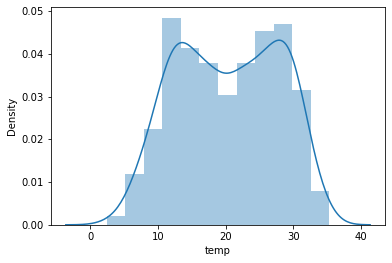

In [26]:
sns.distplot(df.temp)
plt.show()

From the above distplot of temp, we can see that max number of bookings happen when the temp is between 10 to 30 degree celcius

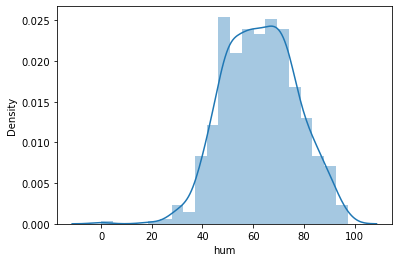

In [27]:
sns.distplot(df.hum)
plt.show()

From the above distplot of humidity, we can see that max number of bookings happen when the humidity is somewhere between 45 to 75.

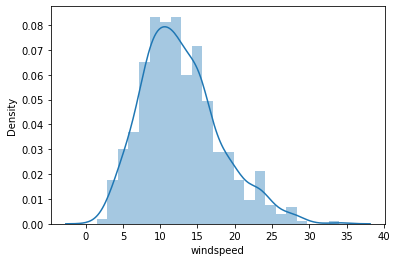

In [28]:
sns.distplot(df.windspeed)
plt.show()

From the above distplot of windspeed, we can see that max number of bookings happen when the windspeed is somewhere between 7 to 15.

### Creating heatmap of numerical variables to understand their corelation with the target variable

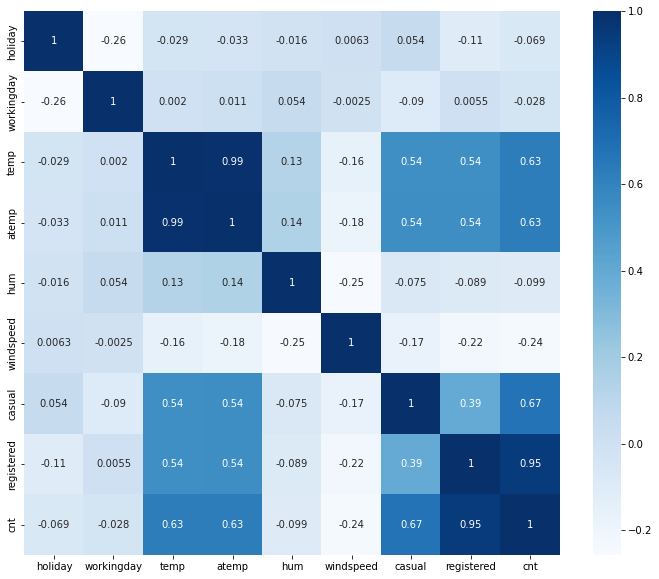

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

As we can observe, "registered", "casual","temp" and "atemp" are highly co-related with the target variable.<br>
1. Lets drop the 'casual' and 'registered' variables as their sum equals the target variable. Hence they will not add any value to our model.
2. Out of 'temp' and 'atemp', we can choose to drop any one variable, as they both give similar information and are equally corelated with the target variable.

In [30]:
#Dropping 'registered','casual' and 'atemp' from the dataset
df.drop(['registered','casual','atemp'],axis=1,inplace=True)

#### Visualising categorical data

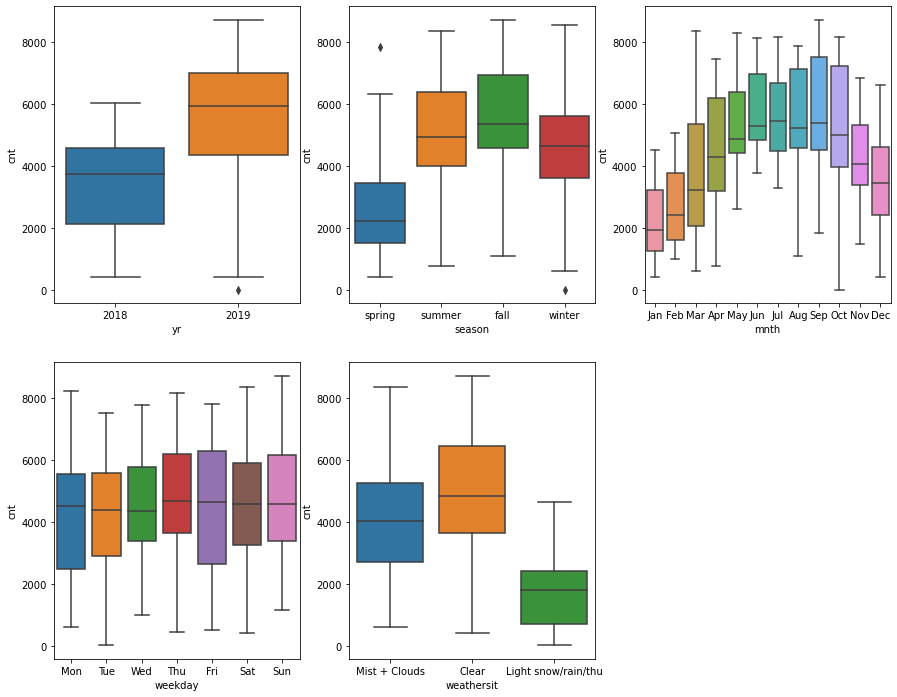

In [31]:
plt.figure(figsize=(15,12))

plt.subplot(2,3,1)
sns.boxplot(x="yr",y='cnt',data=df)
plt.subplot(2,3,2)
sns.boxplot(x="season",y='cnt',data=df)
plt.subplot(2,3,3)
sns.boxplot(x="mnth",y='cnt',data=df)
plt.subplot(2,3,4)
sns.boxplot(x="weekday",y='cnt',data=df)
plt.subplot(2,3,5)
sns.boxplot(x="weathersit",y='cnt',data=df)
plt.show()

From the above boxplots we can observe the below facts:
1. 2019 saw a surge in bookings compared to the year 2018.
2. Spring is a less preferable season for riders to book the bikes.
3. We see a drop in bookings during light snow, rain and thunderstorms.

## Data Preparation

#### Preparing X & Y variables

In [32]:
X = df.drop(columns=["cnt"], axis=1)

In [33]:
y = df["cnt"]

In [34]:
X.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,2018-01-01,spring,2018,Jan,0,Mon,1,Mist + Clouds,14.110847,80.5833,10.749882
1,2018-01-02,spring,2018,Jan,0,Tue,1,Mist + Clouds,14.902598,69.6087,16.652113
2,2018-01-03,spring,2018,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703
3,2018-01-04,spring,2018,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832
4,2018-01-05,spring,2018,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300


In [35]:
print("Categories in 'season' variable: ", end=" ")
print(df["season"].unique())

print("Categories in 'yr' variable: ", end=" ")
print(df["yr"].unique())

print("Categories in 'mnth' variable: ", end=" ")
print(df["mnth"].unique())

print("Categories in 'holiday' variable: ", end=" ")
print(df["holiday"].unique())

print("Categories in 'weekday' variable: ", end=" ")
print(df["weekday"].unique())

print("Categories in 'workingday' variable: ", end=" ")
print(df["workingday"].unique())

print("Categories in 'weathersit' variable: ", end=" ")
print(df["weathersit"].unique())

Categories in 'season' variable:  ['spring' 'summer' 'fall' 'winter']
Categories in 'yr' variable:  ['2018' '2019']
Categories in 'mnth' variable:  ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Categories in 'holiday' variable:  [0 1]
Categories in 'weekday' variable:  ['Mon' 'Tue' 'Wed' 'Thu' 'Fri' 'Sat' 'Sun']
Categories in 'workingday' variable:  [1 0]
Categories in 'weathersit' variable:  ['Mist + Clouds' 'Clear' 'Light snow/rain/thu']


In [36]:
# Dropping the "dteday" column as it doen not serve any purpose in model building
X = X.drop(columns=["dteday"], axis=1)
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,spring,2018,Jan,0,Mon,1,Mist + Clouds,14.110847,80.5833,10.749882
1,spring,2018,Jan,0,Tue,1,Mist + Clouds,14.902598,69.6087,16.652113
2,spring,2018,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703
3,spring,2018,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832
4,spring,2018,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300


Transforming categorical data and standardizing numerical data<br>
For categorical columns using Dummy Variables approach and for numerical columns using Min-Max Scaler

In [37]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [38]:
dummy_dataframes = {}

for column in cat_features:
    dummy_dataframes[column+"_dummy"] = pd.get_dummies(X[column], drop_first=True)

for key in dummy_dataframes.keys():
    X = pd.concat([X,dummy_dataframes[key]], axis=1)

print(X.head())
print(X.shape)
print(cat_features)
X.drop(list(cat_features), axis=1, inplace=True)
print(X.head())
print(X.shape)

   season    yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring  2018  Jan        0     Mon           1  Mist + Clouds  14.110847   
1  spring  2018  Jan        0     Tue           1  Mist + Clouds  14.902598   
2  spring  2018  Jan        0     Wed           1          Clear   8.050924   
3  spring  2018  Jan        0     Thu           1          Clear   8.200000   
4  spring  2018  Jan        0     Fri           1          Clear   9.305237   

       hum  windspeed  spring  summer  winter  2019  Aug  Dec  Feb  Jan  Jul  \
0  80.5833  10.749882       1       0       0     0    0    0    0    1    0   
1  69.6087  16.652113       1       0       0     0    0    0    0    1    0   
2  43.7273  16.636703       1       0       0     0    0    0    0    1    0   
3  59.0435  10.739832       1       0       0     0    0    0    0    1    0   
4  43.6957  12.522300       1       0       0     0    0    0    0    1    0   

   Jun  Mar  May  Nov  Oct  Sep  Mon  Sat  S

In [39]:
X.shape

(730, 28)

In [40]:
X.head()

,holiday,workingday,temp,hum,windspeed,spring,summer,winter,2019,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light snow/rain/thu,Mist + Clouds
0,0,1,14.110847,80.5833,10.749882,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,1,14.902598,69.6087,16.652113,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,43.7273,16.636703,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Splitting the data into training and test sets

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [43]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(584, 28) (584,)
(146, 28) (146,)


### Rescaling the numerical features using Min-Max Scaler

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [46]:
num_features

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed'], dtype='object')

In [47]:
X_train[num_features] = scaler.fit_transform(X_train[num_features])

In [48]:
X_train.head()

,holiday,workingday,temp,hum,windspeed,spring,summer,winter,2019,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light snow/rain/thu,Mist + Clouds
247,1.0,0.0,0.765327,0.814513,0.475900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
335,0.0,0.0,0.317788,0.644911,0.195963,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
702,0.0,1.0,0.519232,0.756118,0.379454,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
440,0.0,0.0,0.566998,0.778874,0.220845,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
136,0.0,1.0,0.626185,0.863461,0.637592,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [49]:
X_train.describe()

,holiday,workingday,temp,hum,windspeed,spring,summer,winter,2019,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light snow/rain/thu,Mist + Clouds
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.032534,0.691781,0.551484,0.654151,0.410017,0.229452,0.250000,0.255137,0.511986,0.077055,0.075342,0.073630,0.090753,0.092466,0.085616,0.065068,0.089041,0.089041,0.095890,0.085616,0.145548,0.147260,0.133562,0.138699,0.152397,0.140411,0.032534,0.344178
std,0.177566,0.462153,0.227249,0.146644,0.187249,0.420841,0.433384,0.436312,0.500285,0.266907,0.264169,0.261392,0.287504,0.289931,0.280037,0.246858,0.285047,0.285047,0.294693,0.280037,0.352955,0.354669,0.340472,0.345928,0.359714,0.347711,0.177566,0.475507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354266,0.542745,0.276424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.566998,0.657578,0.379465,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.745598,0.757346,0.520978,0.000000,0.250000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable selection using RFE

Since we have 28 predictor variables, manual selection can be a very tedious task. Hence we will use RFE to select around top 15 variables, post which, we will do fine tuning using manual selection

In [50]:
#Importing RFE
from sklearn.feature_selection import RFE

Finalizing on the variables based on Linear Regression model. Once the important variables are finalized, will do trial and error on different linear models to select the best model for our problem statement.

In [51]:
#Running RFE with 15 variables to begin with

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [52]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True, False, False,  True, False,  True,  True,  True,
       False,  True, False, False, False, False, False, False,  True,
        True])

In [53]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True, False, False,  True, False,  True,  True,  True,
       False,  True, False, False, False, False, False, False,  True,
        True])

In [54]:
rfe.ranking_

array([ 1,  6,  1,  1,  1,  1,  5,  1,  1, 11,  1, 12, 10,  1, 14,  1,  1,
        1,  2,  1,  3,  7,  8, 13,  4,  9,  1,  1])

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Aug', False, 11),
 ('Dec', True, 1),
 ('Feb', False, 12),
 ('Jan', False, 10),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 3),
 ('Sat', False, 7),
 ('Sun', False, 8),
 ('Thu', False, 13),
 ('Tue', False, 4),
 ('Wed', False, 9),
 ('Light snow/rain/thu', True, 1),
 ('Mist + Clouds', True, 1)]

In [56]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', '2019',
       'Dec', 'Jul', 'Mar', 'May', 'Nov', 'Sep', 'Light snow/rain/thu',
       'Mist + Clouds'],
      dtype='object')

In [57]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'Aug', 'Feb', 'Jan', 'Jun', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [58]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [59]:
X_train_rfe.head()

,holiday,temp,hum,windspeed,spring,winter,2019,Dec,Jul,Mar,May,Nov,Sep,Light snow/rain/thu,Mist + Clouds
247,1.0,0.765327,0.814513,0.475900,0,0,0,0,0,0,0,0,1,0,1
335,0.0,0.317788,0.644911,0.195963,0,1,0,1,0,0,0,0,0,0,0
702,0.0,0.519232,0.756118,0.379454,0,1,1,1,0,0,0,0,0,0,0
440,0.0,0.566998,0.778874,0.220845,1,0,1,0,0,1,0,0,0,0,1
136,0.0,0.626185,0.863461,0.637592,0,0,0,0,0,0,1,0,0,0,1


In [60]:
!pip install statsmodels

In [61]:
#adding a constant varible
import statsmodels.api as sm

X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [62]:
X_train_rfe_sm.head()

,const,holiday,temp,hum,windspeed,spring,winter,2019,Dec,Jul,Mar,May,Nov,Sep,Light snow/rain/thu,Mist + Clouds
247,1.0,1.0,0.765327,0.814513,0.475900,0,0,0,0,0,0,0,0,1,0,1
335,1.0,0.0,0.317788,0.644911,0.195963,0,1,0,1,0,0,0,0,0,0,0
702,1.0,0.0,0.519232,0.756118,0.379454,0,1,1,1,0,0,0,0,0,0,0
440,1.0,0.0,0.566998,0.778874,0.220845,1,0,1,0,0,1,0,0,0,0,1
136,1.0,0.0,0.626185,0.863461,0.637592,0,0,0,0,0,0,1,0,0,0,1


In [63]:
#Running the linear model

lm = sm.OLS(y_train, X_train_rfe_sm).fit()

In [64]:
#Checking the summary of model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     193.9
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          6.10e-212
Time:                        18:57:48   Log-Likelihood:                -4724.9
No. Observations:                 584   AIC:                             9482.
Df Residuals:                     568   BIC:                             9552.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3265.5868    

Well, we have got a pretty good model in the first attempt. R-squared is 83% and so is Adj-Rsquared, which shows high stability. Considering the error margin of 5% for our exercise, p-values of all the variables are below 5%, meaning all the variables are statistically significant. <br>
However, we are yet to check the multi-collinearity using VIF, which might help us drop few more variables.

In [65]:
#Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,hum,25.35
1,temp,16.83
3,windspeed,4.93
5,winter,2.99
4,spring,2.82
14,Mist + Clouds,2.26
6,2019,2.07
11,Nov,1.79
8,Jul,1.58
7,Dec,1.40


As we can see, the VIF for 'hum' and 'temp' are way too high. Dropping 'hum' and re-building the model

In [66]:
#Dropping the 'hum' column
X_train_rfe = X_train_rfe.drop('hum', axis=1)

In [67]:
#Adding constant
X_train_rfe_sm = sm.add_constant(X_train_rfe)

#Running the linear model
lm=sm.OLS(y_train, X_train_rfe_sm).fit()

#Checking model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     198.8
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.05e-208
Time:                        18:57:49   Log-Likelihood:                -4736.0
No. Observations:                 584   AIC:                             9502.
Df Residuals:                     569   BIC:                             9568.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2448.2735    

The overall R-squared of the model dropped by 0.7%. However, the Adj-Rsquared shows the stability in the model and the low prob F-statistic indicates the co-relations are not merely by chance. The p-values of all variables are low. Checking the VIF again.

In [68]:
vif = pd.DataFrame()
vif["Features"]= X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,temp,5.81
2,windspeed,4.88
4,winter,2.47
5,2019,2.06
3,spring,1.80
10,Nov,1.75
13,Mist + Clouds,1.57
7,Jul,1.55
6,Dec,1.35
9,May,1.30


We observe a significant drop in the VIF of 'temp' variable. However, it still is >5. Hence, dropping 'temp' from the model.

In [69]:
#Dropping the 'temp' column
X_train_rfe = X_train_rfe.drop('temp', axis=1)

In [70]:
#Adding constant
X_train_rfe_sm = sm.add_constant(X_train_rfe)

#Running the linear model
lm = sm.OLS(y_train, X_train_rfe_sm).fit()

#Checking the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     157.1
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.19e-178
Time:                        18:57:49   Log-Likelihood:                -4809.3
No. Observations:                 584   AIC:                             9647.
Df Residuals:                     570   BIC:                             9708.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4925.1860    

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,windspeed,2.96
3,winter,2.42
4,2019,1.87
9,Nov,1.73
2,spring,1.70
12,Mist + Clouds,1.54
5,Dec,1.34
8,May,1.21
6,Jul,1.17
7,Mar,1.17


The overall R-squared of the model dropped by ~5%. However, the Adj-Rsquared shows the stability in the model and the low prob F-statistic indicates the co-relations are not merely by chance. <br>
The p-values of 'may','jul' and 'winter' has increated to 10%, 8.8% and 7% respectively and VIFs of all variables are <5. <br>
Dropping 'May'.

In [72]:
#Dropping 'May' column
X_train_rfe = X_train_rfe.drop('May', axis=1)

In [73]:
#Adding constant
X_train_rfe_sm=sm.add_constant(X_train_rfe)

#Running the linear model
lm = sm.OLS(y_train, X_train_rfe_sm).fit()

#Checking model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     169.4
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          3.45e-179
Time:                        18:57:49   Log-Likelihood:                -4810.7
No. Observations:                 584   AIC:                             9647.
Df Residuals:                     571   BIC:                             9704.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4990.0691    

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,windspeed,2.74
3,winter,2.36
4,2019,1.85
8,Nov,1.73
2,spring,1.62
11,Mist + Clouds,1.52
5,Dec,1.34
7,Mar,1.16
6,Jul,1.14
9,Sep,1.13


There was no significant drop in the R-squared and Adj R-squared, showing the stability in the model. VIFs of all the variables are well within the thresholds. The P-value of 'july' column has increased to 18.8%. <br>
Dropping 'july' column.

In [75]:
#Dropping the 'Jul' column
X_train_rfe = X_train_rfe.drop('Jul', axis=1)

In [76]:
#Adding constant
X_train_rfe_sm = sm.add_constant(X_train_rfe)

#Running the linear model
lm = sm.OLS(y_train, X_train_rfe_sm).fit()

#Checking the summary of model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     184.4
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          6.02e-180
Time:                        18:57:50   Log-Likelihood:                -4811.6
No. Observations:                 584   AIC:                             9647.
Df Residuals:                     572   BIC:                             9700.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5044.6292    

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,windspeed,2.61
3,winter,2.32
4,2019,1.81
7,Nov,1.73
2,spring,1.57
10,Mist + Clouds,1.52
5,Dec,1.34
6,Mar,1.16
8,Sep,1.12
9,Light snow/rain/thu,1.10


There was no significant drop in the R-squared and Adj R-squared, showing the stability in the model. VIFs of all the variables are well within the thresholds. The P-value of 'winter' column has increased to 23.8%. <br>
Dropping 'winter' column.

In [78]:
#Dropping 'winter' column
X_train_rfe = X_train_rfe.drop('winter', axis=1)

In [79]:
#Adding constant
X_train_rfe_sm = sm.add_constant(X_train_rfe)

#Runnng the linear model
lm = sm.OLS(y_train, X_train_rfe_sm).fit()

#Printing model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     202.6
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          8.25e-181
Time:                        18:57:50   Log-Likelihood:                -4812.3
No. Observations:                 584   AIC:                             9647.
Df Residuals:                     573   BIC:                             9695.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5078.8120    

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,windspeed,2.54
3,2019,1.78
9,Mist + Clouds,1.50
2,spring,1.47
5,Mar,1.16
6,Nov,1.13
4,Dec,1.12
7,Sep,1.12
8,Light snow/rain/thu,1.09
0,holiday,1.05


There was no significant drop in the R-squared and Adj R-squared, showing the stability in the model. VIFs of all the variables are well within the thresholds. The P-value of 'Mar' column has increased to 6.3%. <br>
Dropping 'Mar' column.

In [81]:
#Dropping 'Mar' column
X_train_rfe = X_train_rfe.drop('Mar', axis=1)

In [82]:
#Adding constant
X_train_rfe_sm = sm.add_constant(X_train_rfe)

#Running the linear model
lm = sm.OLS(y_train, X_train_rfe_sm).fit()

#Printing the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     223.7
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          3.02e-181
Time:                        18:57:51   Log-Likelihood:                -4814.1
No. Observations:                 584   AIC:                             9648.
Df Residuals:                     574   BIC:                             9692.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5091.8291    

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,windspeed,2.53
3,2019,1.78
8,Mist + Clouds,1.49
2,spring,1.39
5,Nov,1.13
6,Sep,1.11
4,Dec,1.10
7,Light snow/rain/thu,1.09
0,holiday,1.05


Now as we can see, the VIFs and p-values both are within an acceptable range. So we can finalize on these predictor variables.

### Preparing test data for evaluation

In [84]:
#Transforming numerical features
X_test[num_features] = scaler.transform(X_test[num_features])

In [85]:
#Dropping all insignificant features from test dataset
X_test_rfe = X_test[X_train_rfe.columns]

In [86]:
#Adding constant
X_test_rfe_sm = sm.add_constant(X_test_rfe)

### Create an Evaluate Function to give all metrices after model training 

In [87]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [95]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(verbose=False),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_rfe, y_train) #Train Model
    
    #Make Predictions
    y_train_pred = model.predict(X_train_rfe)
    y_test_pred = model.predict(X_test_rfe)
    
    #Evaluate Traing and Test Predictions
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for training set")
    print(f"- Root Mean Squared Error : {round(model_train_rmse,2)}")
    print(f"- Mean Absolute Error : {round(model_train_mae,2)}")
    print(f"- R2 Score : {round(model_train_r2,2)}")
    
    print("-------------------------------------")
    
    print("Model performance for test set")
    print(f"- Root Mean Squared Error : {round(model_test_rmse,2)}")
    print(f"- Mean Absolute Error : {round(model_test_mae,2)}")
    print(f"- R2 Score : {round(model_test_r2,2)}")
    r2_list.append(round(model_test_r2,2))
    
    print("="*35)
    print("\n")

Linear Regression
Model performance for training set
- Root Mean Squared Error : 920.03
- Mean Absolute Error : 689.33
- R2 Score : 0.78
-------------------------------------
Model performance for test set
- Root Mean Squared Error : 931.28
- Mean Absolute Error : 727.42
- R2 Score : 0.75


Lasso
Model performance for training set
- Root Mean Squared Error : 920.1
- Mean Absolute Error : 689.26
- R2 Score : 0.78
-------------------------------------
Model performance for test set
- Root Mean Squared Error : 929.15
- Mean Absolute Error : 725.2
- R2 Score : 0.75


Ridge
Model performance for training set
- Root Mean Squared Error : 920.51
- Mean Absolute Error : 689.85
- R2 Score : 0.78
-------------------------------------
Model performance for test set
- Root Mean Squared Error : 924.96
- Mean Absolute Error : 721.52
- R2 Score : 0.75


K-Neighbors Regressor
Model performance for training set
- Root Mean Squared Error : 803.19
- Mean Absolute Error : 599.87
- R2 Score : 0.83
---------

### Results

In [97]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model_Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model_Name,R2_Score
0,Linear Regression,0.75
1,Lasso,0.75
2,Ridge,0.75
3,K-Neighbors Regressor,0.72
7,CatBoosting Regressor,0.71
8,AdaBoost Regressor,0.71
5,Random Forest,0.67
6,XGBRegressor,0.67
4,Decision Tree,0.61


Based on the above model metrices, Linear Regression seems to be the appropriate model for this problem.

## Residual Analysis of the train data

To verify the assumptions of linear regression, we need to check if the error terms are normally distributed (which is infact, one of the major assumptions of linear regression). Plotting a histogram of the error terms to verify the same.

In [98]:
y_train_lm = lm.predict(X_train_rfe_sm)

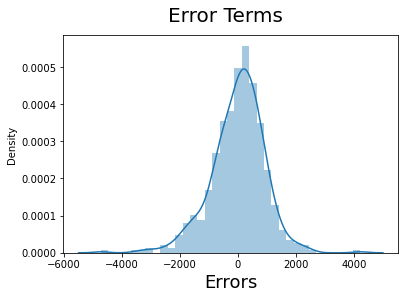

In [99]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_lm))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

Well, we can see that the error terms are normally distributed and the mean lies around 0.

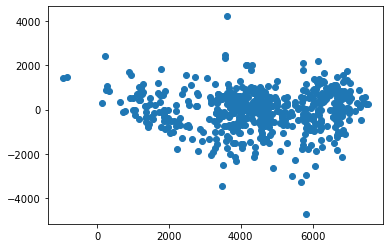

In [100]:
# Plotting a scatter plot to check if the error terms are independent of eachother and does not follow any pattern
res=y_train - y_train_lm
plt.scatter(y_train_lm,res)
plt.show()

From the above scatter plot we can conclude that the error terms are independent of eachother and does not follow any pattern

### Final Model

In [103]:
lin_model = LinearRegression(fit_intercept=True)

lin_model = lin_model.fit(X_train_rfe, y_train)

y_pred = lin_model.predict(X_test_rfe)

score = round(r2_score(y_test, y_pred)*100,2)

print(f"Accuracy of the model is {score}")

Accuracy of the model is 74.66


### Plot y_pred & y_test

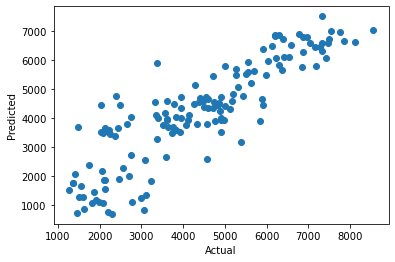

In [106]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

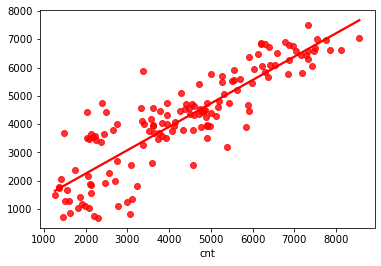

In [108]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')